In [17]:
import torch
import os
import pandas as pd
from PIL import Image
import torch.utils
import torch.utils.data
from pathlib import Path
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
BASE_DIR = Path.cwd().parent
data_dir = os.path.join(BASE_DIR, "data", "United_States")
train_data_dir = os.path.join(data_dir, "train")
train_images_path = os.path.join(train_data_dir, "images")
train_labels_path = os.path.join(train_data_dir, "annotations", "xmls")

print(train_images_path)
print(train_labels_path)

c:\Users\marangi\Desktop\projects\RDD2022\data\United_States\train\images
c:\Users\marangi\Desktop\projects\RDD2022\data\United_States\train\annotations\xmls


In [3]:
train_images = []
for image in os.listdir(train_images_path):
    img_path = os.path.join(train_images_path, image)
    img = Image.open(img_path)
    train_images.append(img)

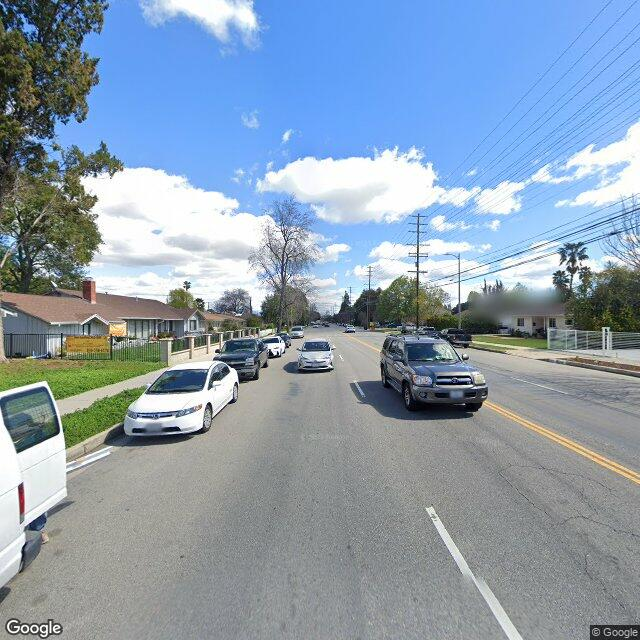

In [6]:
train_images[0]

In [7]:
train_labels = []
for xml_name in os.listdir(train_labels_path):
    if xml_name.endswith(".xml"):
        xml_path = os.path.join(train_labels_path, xml_name)
        xml_content = ET.parse(xml_path)
        train_labels.append(xml_content)

In [14]:
root = train_labels[0].getroot()
for child in root:
    print(child.tag, child.attrib)
print()
for object in root.findall('object'):
    print(object.find('name').text)
    print(object.find('bndbox'))
    print(object.find('bndbox').find('xmin').text)
    print(object.find('bndbox').find('ymin').text)
    print(object.find('bndbox').find('xmax').text)
    print(object.find('bndbox').find('ymax').text)
    print()

folder {}
filename {}
size {}
segmented {}
object {}
object {}
object {}

D10
<Element 'bndbox' at 0x000001FE6A1C5990>
556
510
640
544

D10
<Element 'bndbox' at 0x000001FE6A1C5CB0>
502
458
624
494

D00
<Element 'bndbox' at 0x000001FE6A1C5FD0>
579
552
633
615



In [41]:
def plot_img_bbox(idx):
    img_0 = train_images[idx]
    root_0 = train_labels[idx].getroot()

    fig, ax = plt.subplots()
    ax.imshow(img_0)

    for object in root_0.findall('object'):
        bbox = object.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='b', facecolor='none')

        ax.add_patch(rect)
        class_name = object.find('name').text
        plt.text(xmin, ymin-5, class_name, color='blue')
    plt.show()

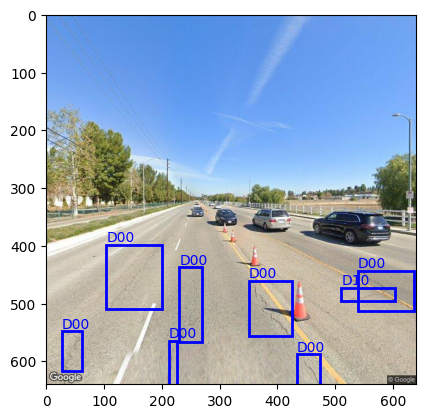

In [42]:
idx = 4
plot_img_bbox(idx)